In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.decomposition import NMF
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd
import ensemble as nmf

import SimilarityMatrixAnalysis as sm
os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
mouse = '4139265.4'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')|
                   df_mouse['Track'].str.match('TwoTower_foraging')]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [3]:
sess = df_mouse.iloc[-1]

In [4]:
VRDat,C, S, A = pp.load_scan_sess(sess)
Smean = np.mean(S,axis=0)
S /= Smean[np.newaxis,:]

num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [6]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
S_flatmat = S_trial_mat.reshape([S_trial_mat.shape[0],-1])

S_morph_dict = u.trial_type_dict(S_trial_mat,trial_info['morphs'])

In [10]:
X = sm.morph_by_cell_mat(S_morph_dict,sig=0)

(1506, 45) (45, 1506)
(1506, 90) (45, 1506)
(1506, 135) (45, 1506)
(1506, 180) (45, 1506)


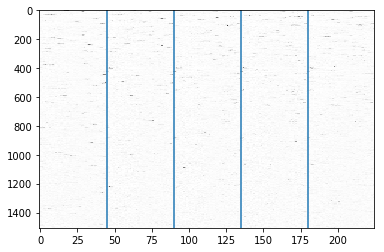

In [14]:
f,ax = plt.subplots()
ax.imshow(X/X.mean(axis=1).reshape([-1,1]),aspect='auto',cmap='Greys')
for v in [45, 90, 135,180]:
    ax.axvline(v,ymin=0,ymax=S.shape[0])


In [15]:
f.savefig("G:\\My Drive\\LabEvening_2019\\ex_cell_posxmorph.pdf",format='pdf')